In [50]:
import matplotlib
matplotlib.use("Agg")
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from skimage import transform
from skimage import exposure
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
from os import listdir
from sklearn.model_selection import train_test_split
import cv2
import os
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, MaxPool2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from PIL import Image

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
%matplotlib inline

In [51]:
train_path = "Traffic Sign\\Train\\"
test_path = "Traffic Sign/Test/"

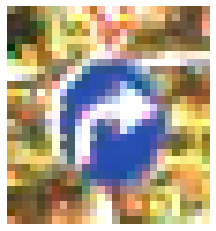

In [78]:
img = load_img(test_path + "00003.png")
plt.imshow(img)
plt.axis("off")
plt.show()

In [53]:
x = img_to_array(img)
print(x.shape)

(54, 53, 3)


In [54]:
numberOfClass = len(glob(train_path+"\\*"))
numberOfClass

43

In [55]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [56]:
for i in range(classes):
    path = os.path.join("C:\\Users\\Mehmet\\Documents\\Python Scripts\\çalışma\\Traffic Sign\\Traffic Sign\\Train\\",str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

Error loading image


In [58]:
data = np.array(data)
labels = np.array(labels)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [60]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [69]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [70]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/5
31367/31367 [==============================] - 145s 5ms/sample - loss: 2.4640 - accuracy: 0.3805 - val_loss: 0.5651 - val_accuracy: 0.8563
Epoch 2/5
31367/31367 [==============================] - 149s 5ms/sample - loss: 0.6811 - accuracy: 0.8048 - val_loss: 0.1585 - val_accuracy: 0.9637
Epoch 3/5
31367/31367 [==============================] - 158s 5ms/sample - loss: 0.3392 - accuracy: 0.9026 - val_loss: 0.0631 - val_accuracy: 0.9839
Epoch 4/5
31367/31367 [==============================] - 153s 5ms/sample - loss: 0.2480 - accuracy: 0.9302 - val_loss: 0.0475 - val_accuracy: 0.9883
Epoch 5/5
31367/31367 [==============================] - 147s 5ms/sample - loss: 0.1929 - accuracy: 0.9467 - val_loss: 0.0298 - val_accuracy: 0.9936


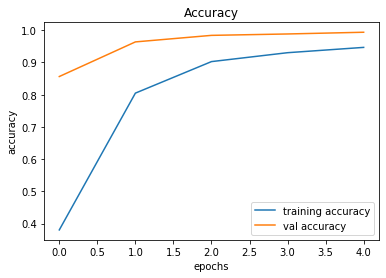

In [71]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

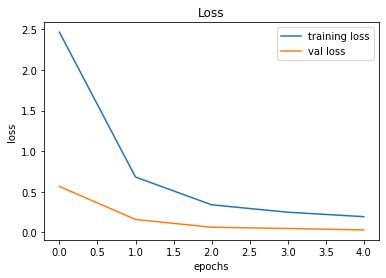

In [72]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()